# Importing Basic Dependencies

In [21]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) 
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# removing the Unnamed: 0 column

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
        'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.duplicated().sum()

29

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns

cat_vars, num_vars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [10]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [11]:
'''
so on observation we can see that if we remove "GB" from RAM, I can make it
as an integer value then after. Now same goes with Memory as well as Weight, 
for Weight I can classify it as floating variable using the str.replace()
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

# converting from string->float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

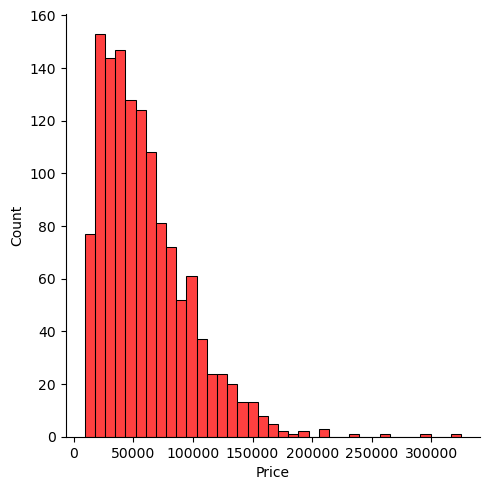

In [15]:
# viewing the distribution of the price column

sn.displot(df['Price'],color='red')

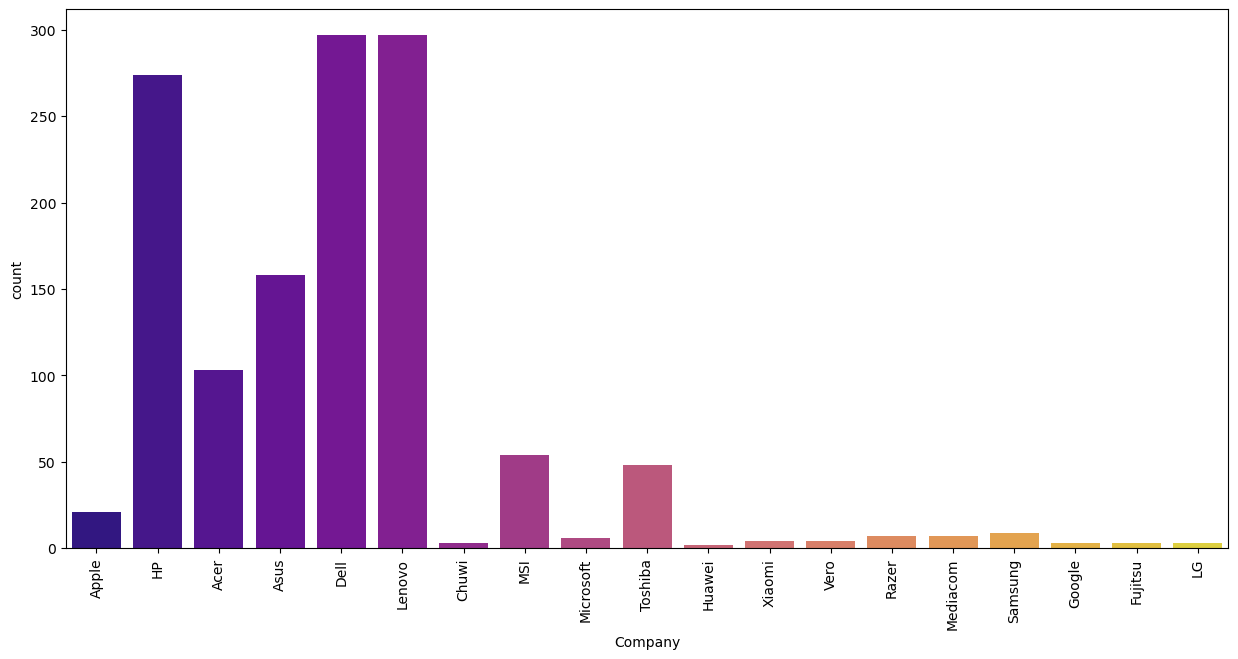

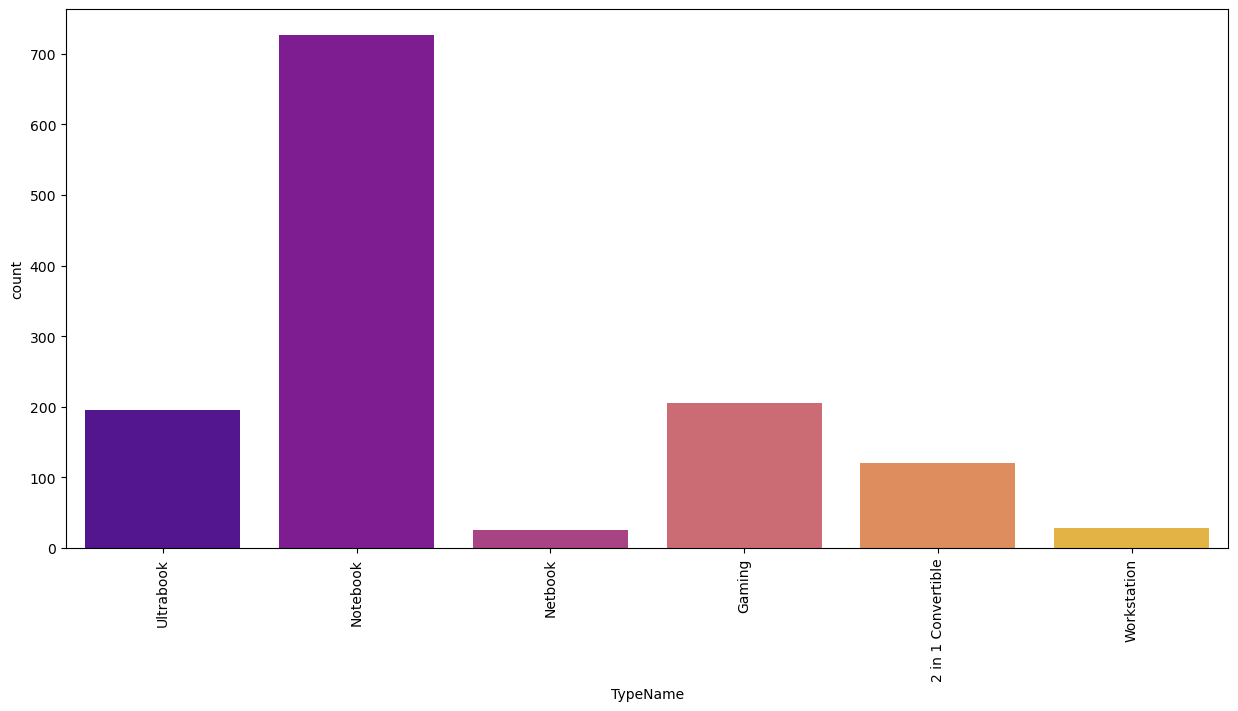

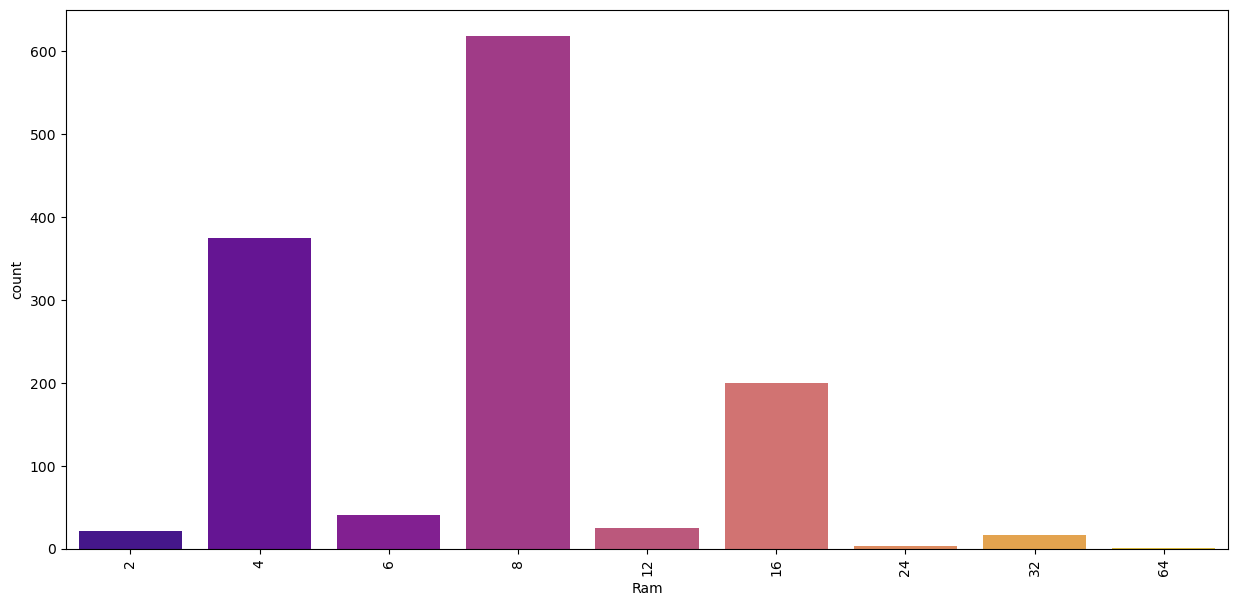

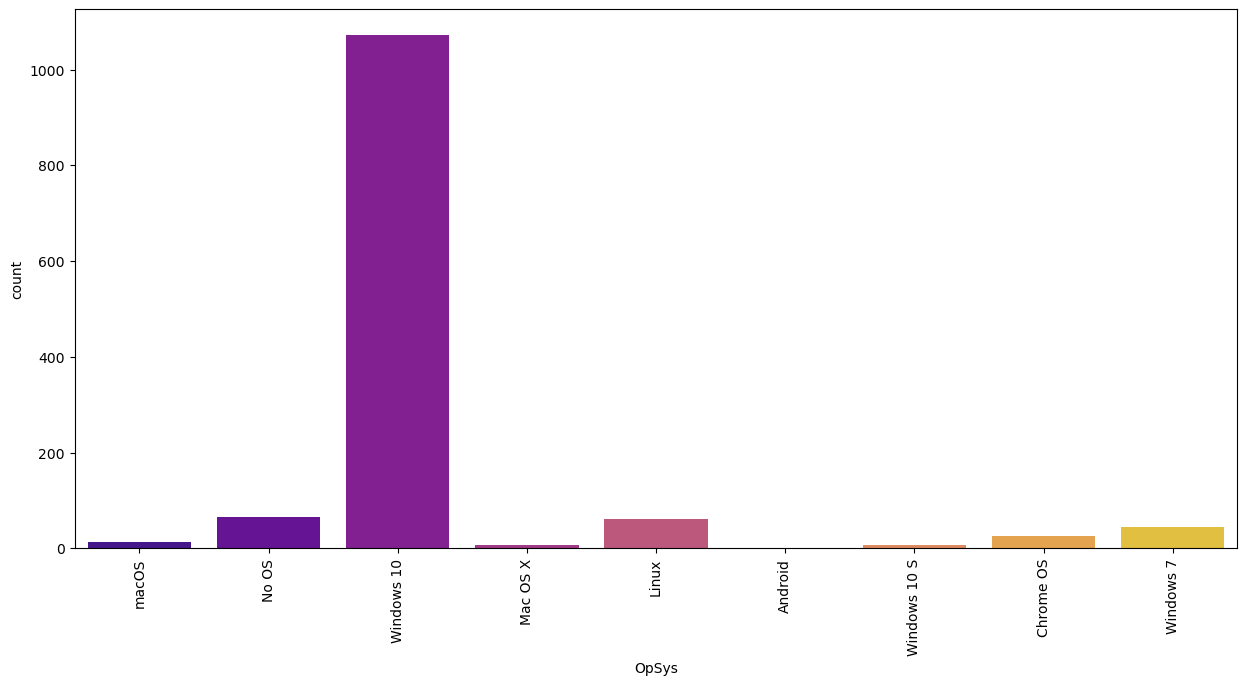

In [22]:
# plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col], palette='plasma')
    plt.xticks(rotation='vertical')
    
to_view = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in to_view:
    drawplot(col)

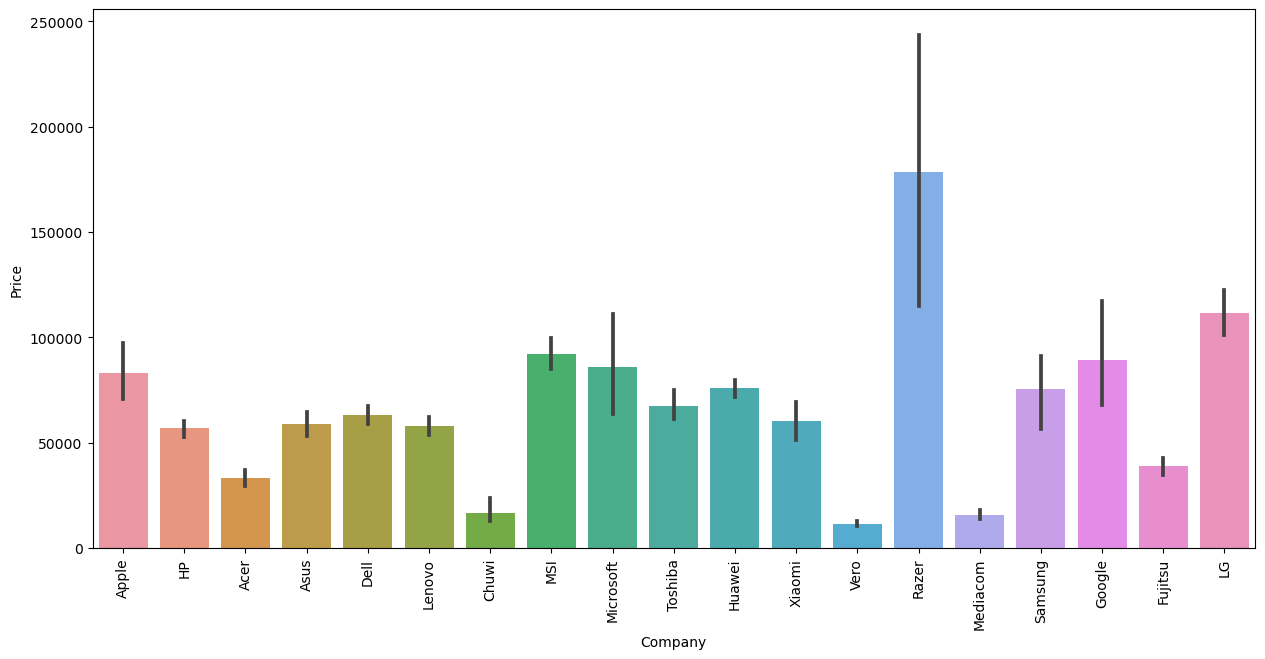

In [23]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary

plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

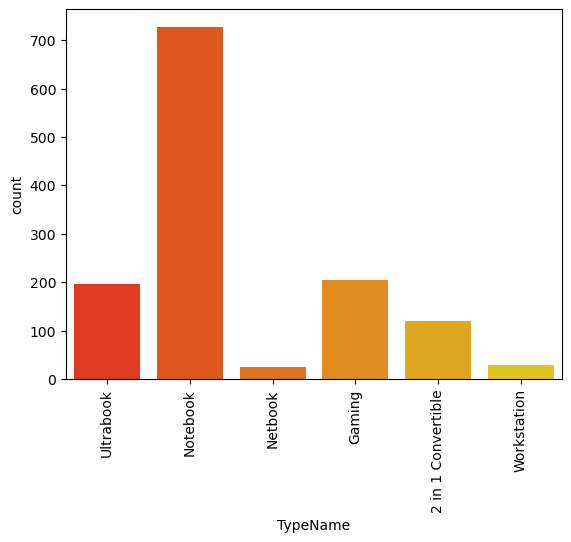

In [24]:
# various types of laptop

sn.countplot(df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

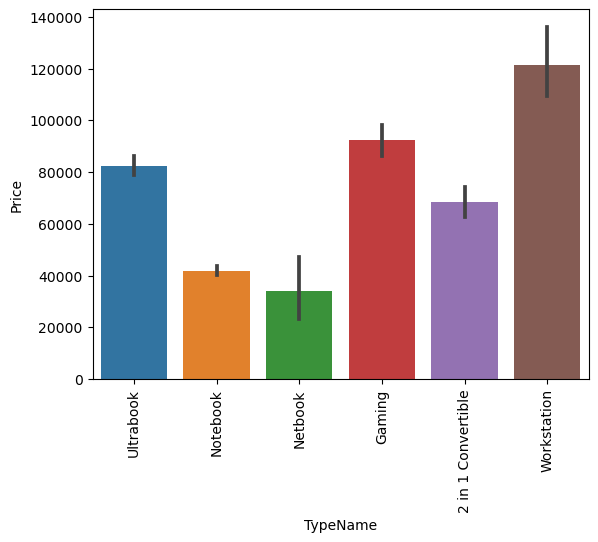

In [25]:
# laptop type and variation about the price

sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

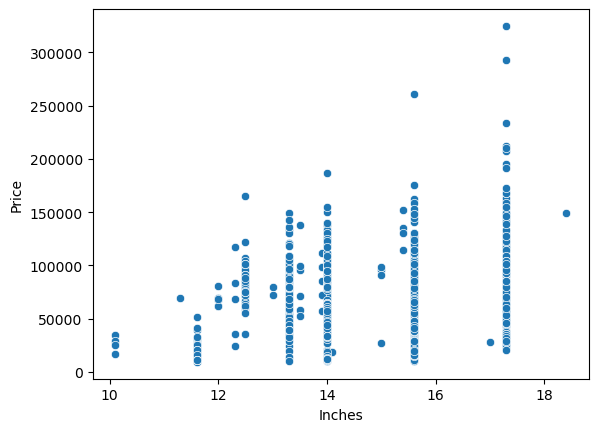

In [26]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

**For the Screen Resolution column we have many types of Screen Resolutions out there as shown as Touch Screen and Normal and IPS Panel are the 3 parts on basis of which we can segregate the things**

In [27]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [29]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [28]:
# creating a new col, touchscreen if the value is 1 that laptop is touch screen 

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1
                                                      if 'Touchscreen' in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [31]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1096,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.264,0
772,Toshiba,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.75,54345.600,0
798,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,71874.720,1
1290,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.520,0
1029,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,57542.400,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

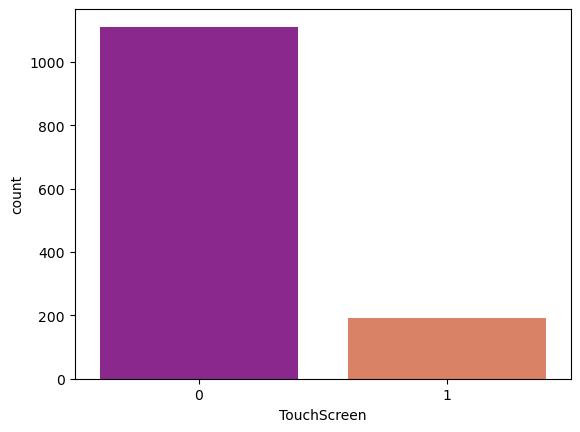

In [32]:
sn.countplot(df['TouchScreen'], palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

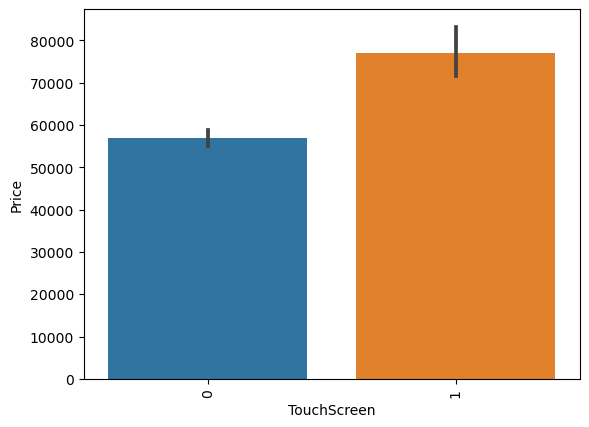

In [33]:
# touch screen on comparison with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [34]:
# creating a new col named IPS, does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
360,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389.92,0,0
1076,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,4,1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,52054.56,0,1
1092,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85194.72,0,1
1161,MSI,Gaming,14.0,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.70,94252.32,0,0
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,18541.44,0,0


<AxesSubplot:xlabel='IPS', ylabel='count'>

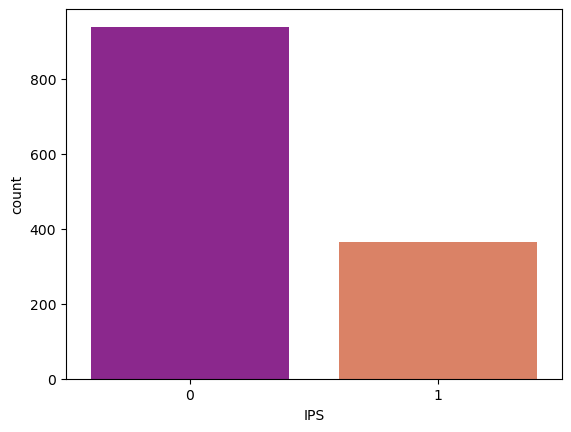

In [35]:
sn.countplot(df['IPS'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

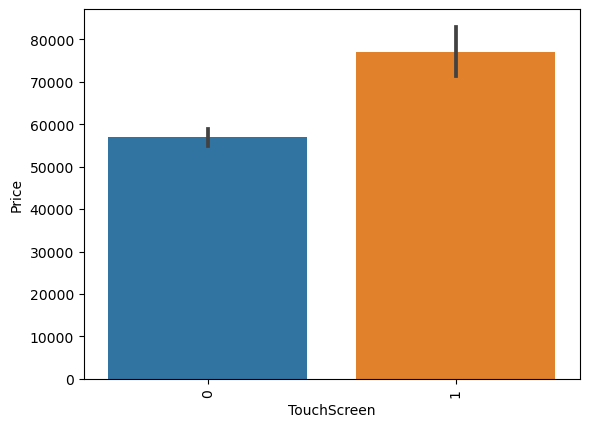

In [36]:
# price variation with respect to the IPS col

sn.barplot(x = df['TouchScreen'], y = df['Price'])
plt.xticks(rotation = 'vertical')

# Extracting the X Resolution and the Y Resolution

In [ ]:
2560x1440 -----> <before>x<after>

In [38]:
'''
We will split the text at the "x" letter and seperate the 2 parts. 
From this we can observe that one of the col is Y res, we need to do
some feature engineering on the X res col
'''

split_df = df['ScreenResolution'].str.split('x',n = 1,expand=True)
split_df.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [39]:
split_df = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = split_df[0]
df['Y_res'] = split_df[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [40]:
'''
So basically from that whole text of the X_res col, we need to 
extract the digits from it, but the problem is the numbers are scattered
in some cases, that is the why I am using regex, if we use this
we will exactly get the numbers which we are looking for,
So firstly replace all the "," with "" and then find all numbers
from that string as "\d+.?\d+", \d means that integer number and \.?
all the numbers which come after an number and \d+ the string must end with number

'''

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [41]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


<AxesSubplot:>

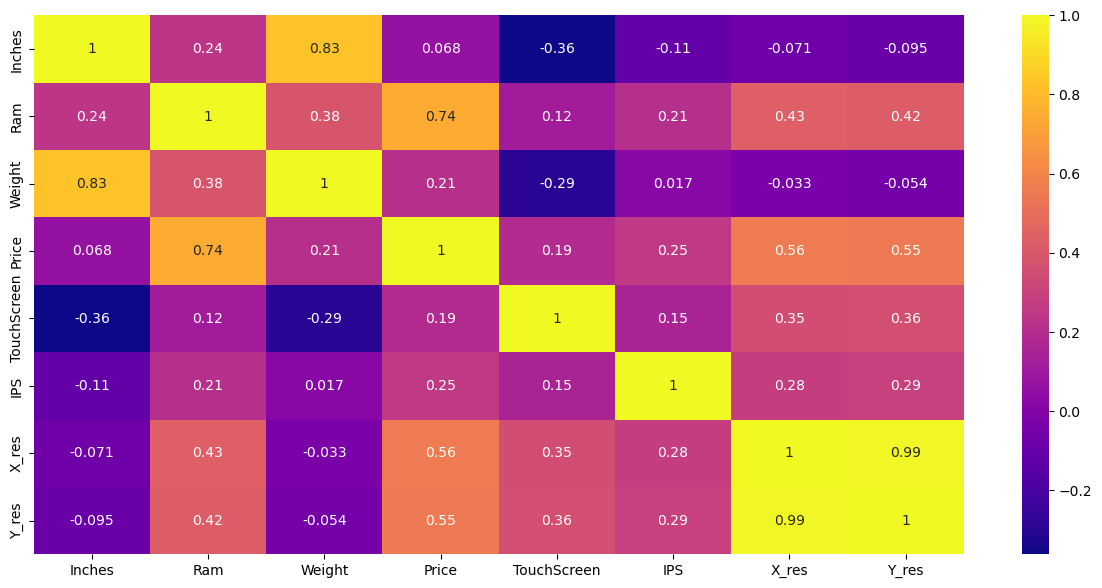

In [42]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True,cmap='plasma')

In [43]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [44]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [45]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

**So we observe from the correlation data that the PPI is having good correlation, so we will be using that, as that is a combination of 3 features and that gives collective results of 3 columns, so we will drop Inches, X_res, Y_res as well**

In [46]:
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


**Now we will work on CPU column, as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [47]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

**Most common processers are made by Intel, so we will be clustering their processers into different categories like i5, i7,other, now other means the processers of Intel which do not have i3, i5 or i7 attached to it, they are completely different so that's the reason I will cluster them into other and other category is AMD which is different category in whole**

**So if we observe we need to extract the first 3 words of the CPU column, as the first 3 words of every row under the CPU col is the type of the CPU, so we will be using them.**

In [48]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [49]:
'''
As mentioned earlier, if we get any of the Intel versions we will return
them as it is, but if we get any other processer we will first check 
whether is that a variant of the intel? or not if yes, then we will tag
it as "Other Intel Processer" else we will say it as "AMD Processer".

'''

def processertype(text):
    
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processer'

        else:
            return 'AMD Processer'
        
df['CPU_name'] = df['CPU_name'].apply(lambda text:processertype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processer'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processer')])

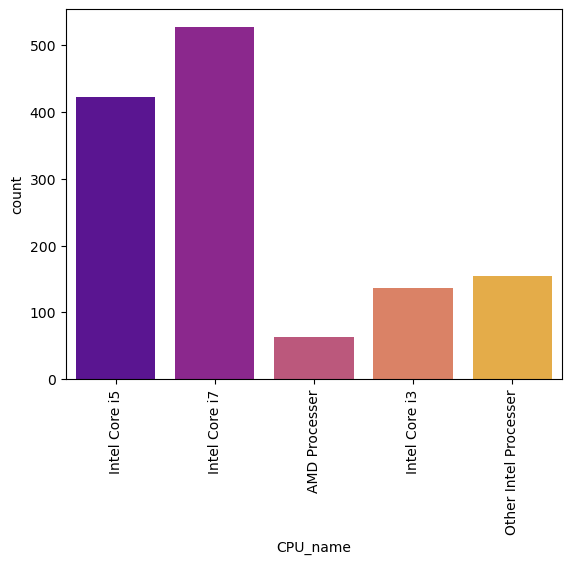

In [50]:
sn.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processer'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processer')])

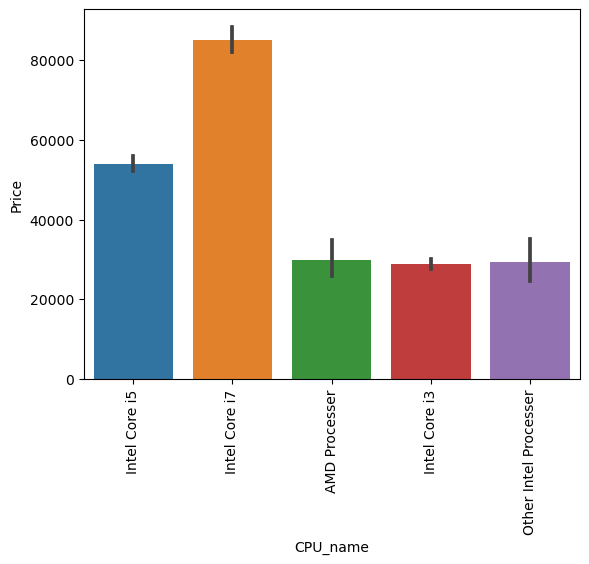

In [51]:
# price vs processer variation 

sn.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation = 'vertical')

In [52]:
# dropping the cpu column 

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# Analysis on RAM column

<AxesSubplot:xlabel='Ram', ylabel='count'>

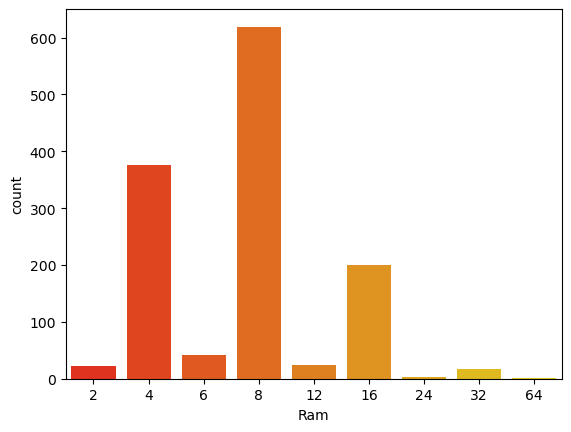

In [53]:
sn.countplot(df['Ram'],palette='autumn')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

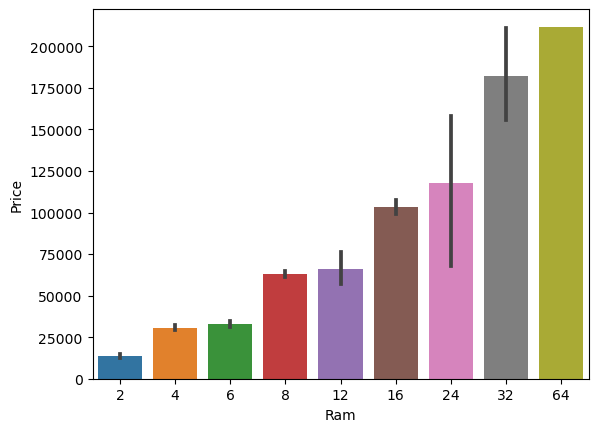

In [54]:
# ram is having good relation with price

sn.barplot(df['Ram'],df['Price'])

**ABOUT THE MEMORY COLUMN**

**We will seperate the Type of memory and the value of it, just similar to the one which is done in the previous part**

**This part invloves things which are needed to be done in steps, so here we do not have the memory as a complete we have it in different dimension as 128GB SSD + 1TB HDD, so inorder to ofr it come in a same dimension we need to do some modifications which are done below as shown**

In [55]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [56]:
# we have different categories and also different kinds of variations 

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [57]:
# 4 most common variants observed : HDD,SDD,Flash, Hybrid
# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with ""

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word across the "+" character

new_df = df['Memory'].str.split("+",n=1,expand = True)
new_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [58]:
# we will strip up all the white spaces, basically eliminating white space

df['first'] = new_df[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [59]:
def applychanges(value):
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
list_to_apply = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
for value in list_to_apply:
    applychanges(value)
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [60]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [61]:
df['Second'] = new_df[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [62]:
def applychanges1(value):
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
list_to_apply1 = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in list_to_apply1:
    applychanges1(value)
    
# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [63]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [65]:
# multiplying the elements and storing the result in subsequent columns

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

# droping of unnecessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                'Layer2FlashStorage'],inplace=True)

In [66]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
767,Dell,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,58554.720,1,1,282.423996,Intel Core i7,1000,128,0,0
641,HP,Notebook,8,1000 HDD,AMD Radeon R5,Windows 10,2.60,27753.552,0,0,107.985646,AMD Processer,1000,0,0,0
1129,HP,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.120,0,1,127.335675,Intel Core i5,1000,128,0,0
1174,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,37775.520,0,0,141.211998,Intel Core i7,1000,0,0,0
212,HP,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,2.10,18594.720,0,0,141.211998,Intel Core i3,500,0,0,0


In [67]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
45,Apple,Ultrabook,8,Intel Iris Graphics 540,macOS,1.37,75604.32,0,1,226.983005,Intel Core i5,0,256,0,0
1095,Acer,Notebook,8,Nvidia GeForce GTX 950M,Windows 10,2.40,42570.72,0,0,141.211998,Intel Core i5,1000,256,0,0
563,Lenovo,Notebook,8,Nvidia Quadro M620M,Windows 10,3.40,159786.72,0,1,127.335675,Intel Core i7,0,256,0,0
669,Acer,Notebook,4,Intel HD Graphics 520,Linux,2.10,21951.36,0,0,100.454670,Intel Core i3,0,128,0,0
1287,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,100.454670,Intel Core i7,1000,0,0,0


In [68]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

**Based on the correlation we observe that Hybrid and Flash Storage are almost negligible, so we can simply drop them off, where as HDD and SSD are having good correlation, we find that HDD has -ve relation with Price, and that's true, if the price of laptop is increasing there is more probability that the laptop is gonna use SSD instead of HDD and vice versa as well**

In [69]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [70]:
df.drop(columns=['Hybrid', 'Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# Analysis on GPU

In [71]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Here as we are having less data regarding the laptops, its better that we focus on GPU brands instead focusing on the values which are present there beside them, we will focus on the brands**

In [72]:
# this is what we will be doing, extracting the brands

a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<AxesSubplot:xlabel='Gpu Brand', ylabel='count'>

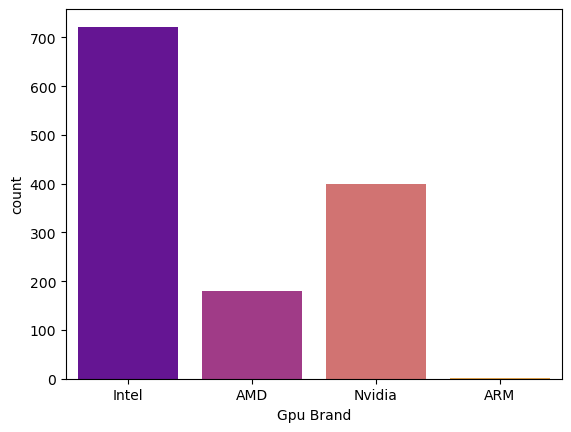

In [73]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu Brand'],palette='plasma')

<AxesSubplot:xlabel='Gpu Brand', ylabel='count'>

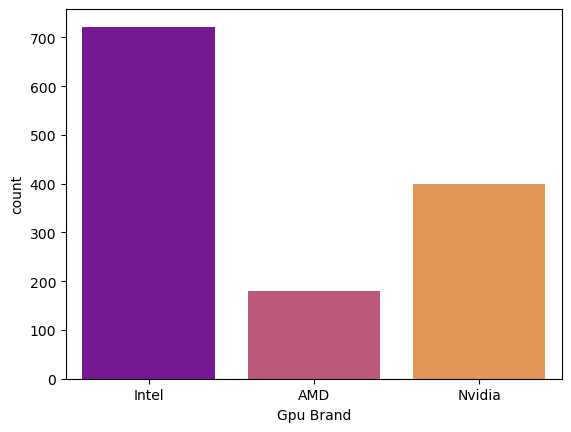

In [74]:
# removing the "ARM" tuple

df = df[df['Gpu Brand']!='ARM']
sn.countplot(df['Gpu Brand'],palette='plasma')

<AxesSubplot:xlabel='Gpu Brand', ylabel='Price'>

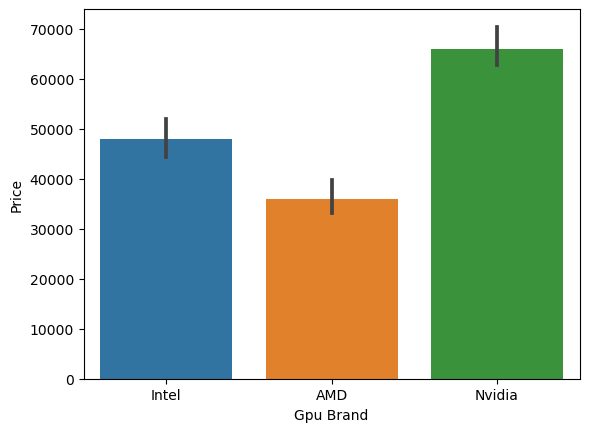

In [75]:
# price-GPU analysis, I have used np.median in order to check if there is any impact of outlier or not

sn.barplot(df['Gpu Brand'],df['Price'],estimator=np.median)

In [76]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# Operating System Analysis

In [77]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

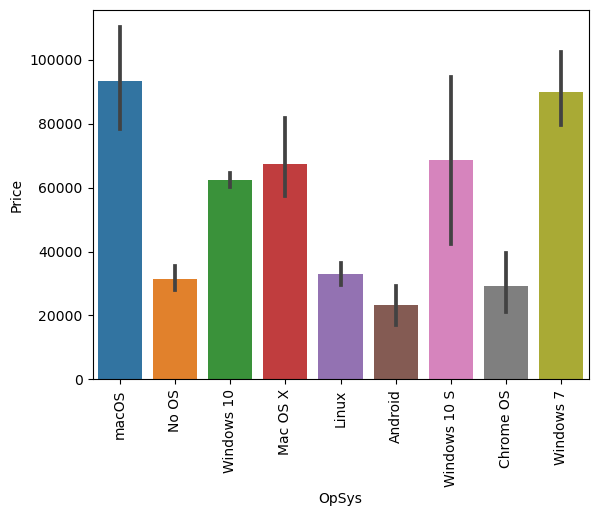

In [79]:
sn.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [80]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [81]:
# club {Windows 10, Windows 7, Windows 7S}--> Windows
# club {macOS, macOS X}--> mac
# else return Others

def setcategory(text):
    
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'Mac OS X' or text == 'macOS':
        return 'Mac'
    else:
        return 'Other'
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [82]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu Brand
545,HP,Notebook,4,Windows,2.10,37589.0400,0,0,141.211998,Intel Core i3,0,128,Intel
168,Acer,Notebook,8,Windows,3.00,45501.1200,0,1,127.335675,Intel Core i5,0,256,Nvidia
1221,MSI,Gaming,8,Windows,2.20,78647.1408,0,0,141.211998,Intel Core i7,1000,128,Nvidia
553,HP,Notebook,8,Windows,2.65,28992.3120,0,0,106.113062,Intel Core i3,1000,0,Intel
939,Dell,Gaming,16,Windows,4.36,146946.2400,0,0,169.780899,Intel Core i7,1000,512,Nvidia


<AxesSubplot:xlabel='OpSys', ylabel='count'>

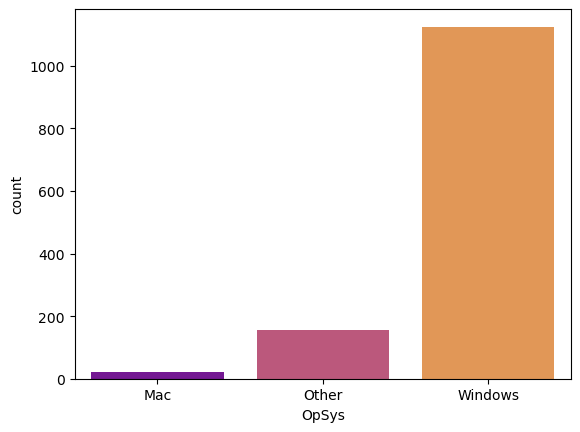

In [83]:
sn.countplot(df['OpSys'],palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

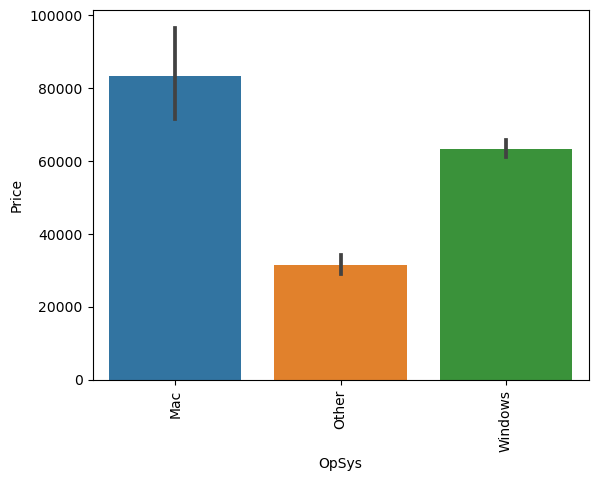

In [84]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

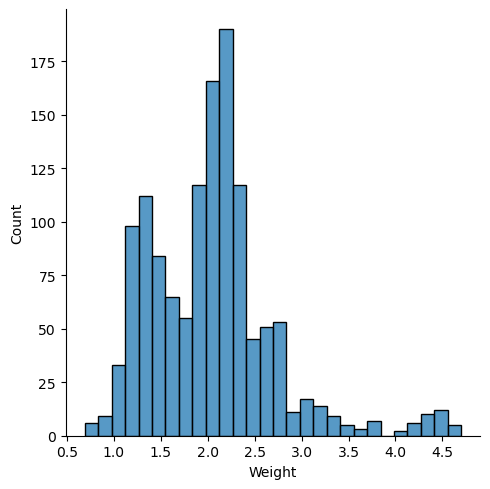

In [85]:
sn.displot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

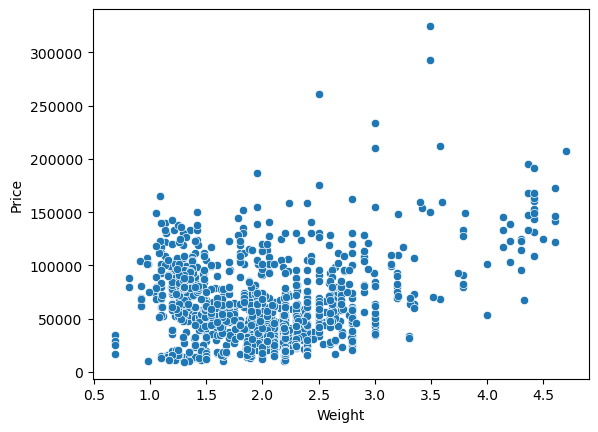

In [86]:
sn.scatterplot(df['Weight'],df['Price'])

# Price Analysis

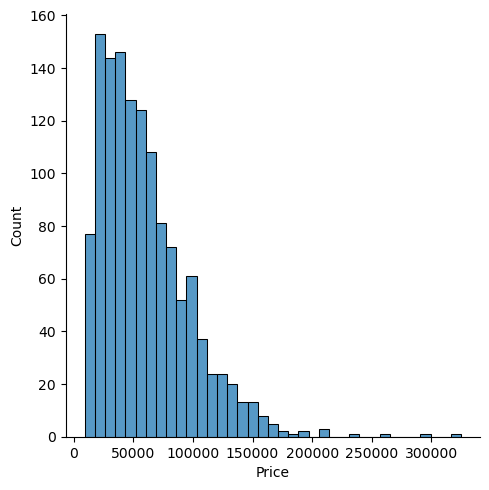

In [87]:
sn.displot(df['Price'])

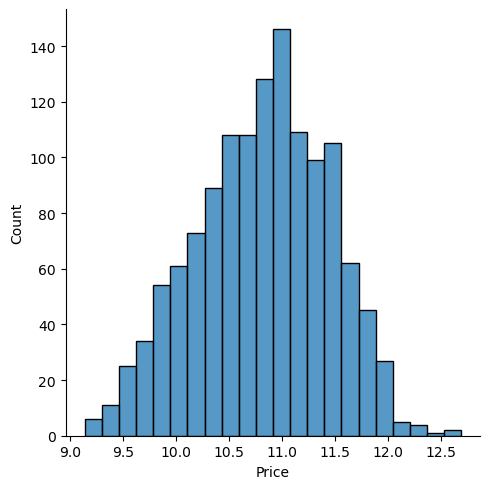

In [88]:
# so if we apply np.log to the Price col we get a Gaussian Distribution

sn.displot(np.log(df['Price']))

In [89]:
# correlation with price

df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

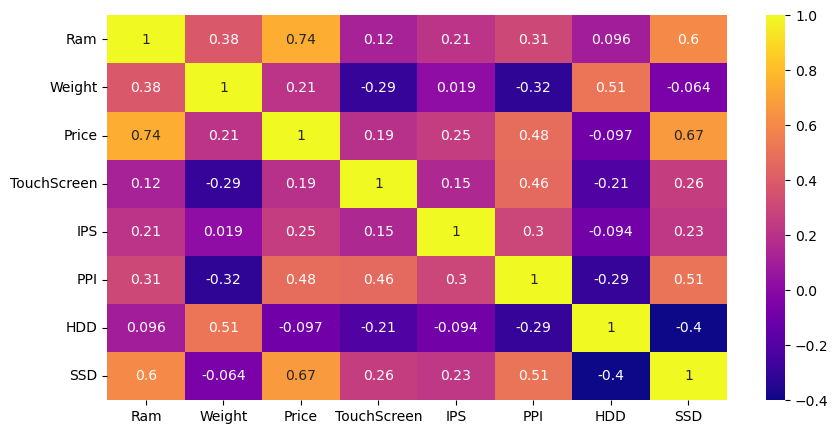

In [90]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(), annot=True,cmap='plasma')

# Model Building

In [91]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis=1)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [97]:
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.15,random_state=2)
X_train.shape, X_test.shape

((1106, 12), (196, 12))

**There's a CLass which we imported named as Column Transformer we use this widely while building our models using Pipelines, so for this we have to get the index numbers of the columns which are having categorical variables**

In [98]:
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu Brand'}

In [100]:
'''
We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11].
The remainder we keep as passthrough i.e no other col must get effected
except the ones undergoing the transformation!

'''

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418629
MAE 0.2101782797642863


In [101]:
'''
Now MAE is 0.21, so if we want to check how much difference is there, DO THIS.
We see there is a difference of 1.23 only as per the original value, then our model
predicts +-0.21 more/less than the original price.

'''

np.exp(0.21)

1.2336780599567432

# Ridge Regression

In [102]:
'''
We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11].
The remainder we keep as passthrough i.e no other col must get effected
except the ones undergoing the transformation!

'''

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.812733103131181
MAE 0.2092680224258296


# Lasso Regression

In [103]:
'''
We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11].
The remainder we keep as passthrough i.e no other col must get effected
except the ones undergoing the transformation!

'''

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8071857196899418
MAE 0.2111435071691317


# Decision Tree

In [104]:
'''
We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11].
The remainder we keep as passthrough i.e no other col must get effected
except the ones undergoing the transformation!

'''

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8355814206219802
MAE 0.18401382335583197


# Random Forest

In [105]:
'''
We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11].
The remainder we keep as passthrough i.e no other col must get effected
except the ones undergoing the transformation!

'''

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8851499847098487
MAE 0.15870252595141304


In [106]:
import pickle 

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [107]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [108]:
train.to_csv('trained_data.csv',index=None)

# Hyperparameter Tuning for Random Forest

In [109]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu Brand']

In [110]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processer,Gpu Brand_Intel,Gpu Brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.15,random_state=2)
X_train.shape, X_test.shape

((1106, 38), (196, 38))

[Text(0.48695515408494544, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.2209818626999799, 0.9347826086956522, 'CPU_name_Other Intel Processer <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.14562292907825156, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.09780084845036481, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 10.233'),
 Text(0.04177613963451369, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 10.183'),
 Text(0.0074971550973960775, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(0.005355110783854341, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(0.004284088627083473, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 10.208'),
 Te

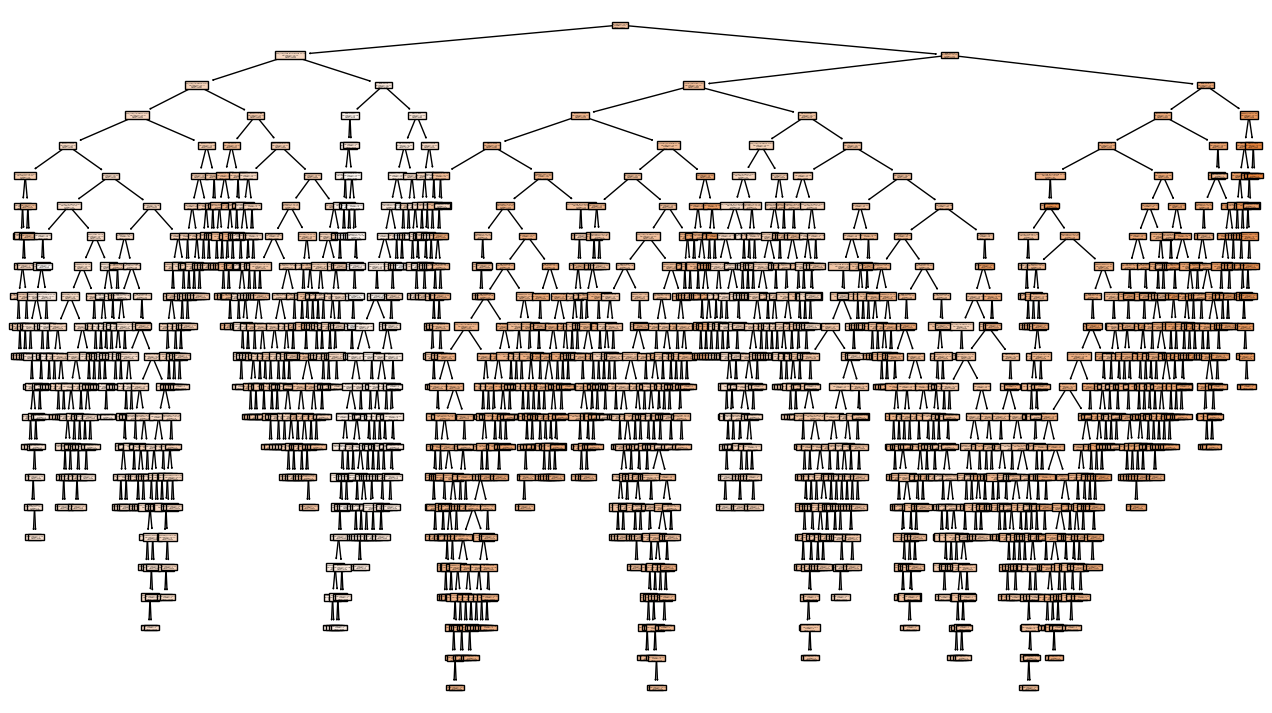

In [112]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [113]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [114]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

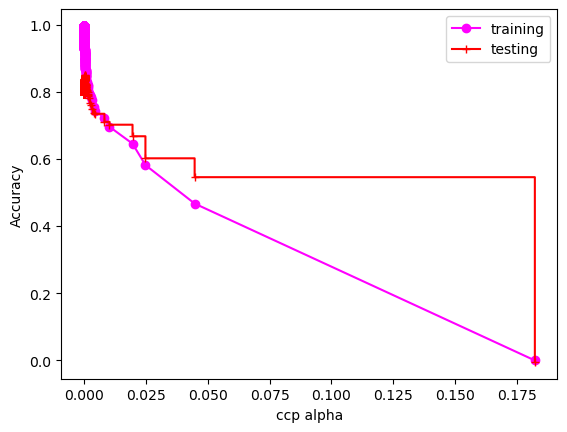

In [115]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
        label = 'testing',color = 'red', drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between [0.0025-->0.0075]**

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.25, 0.7, 'CPU_name_Other Intel Processer <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 11.558')]

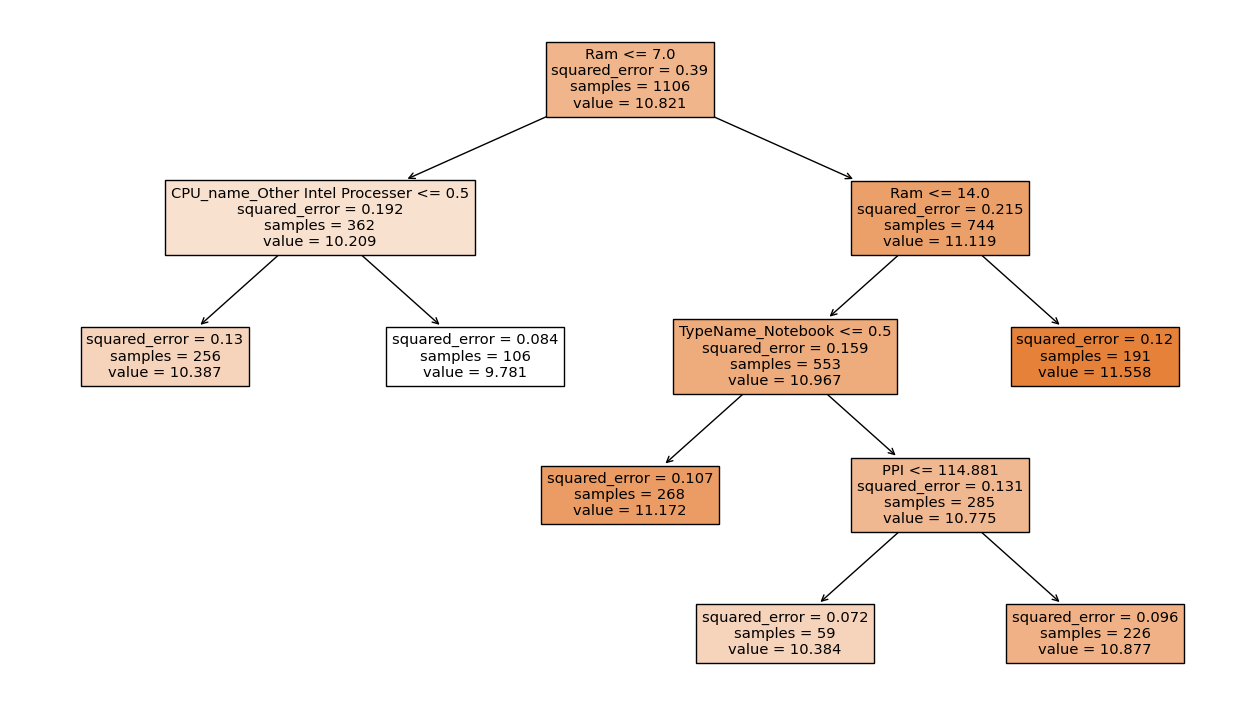

In [116]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [117]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [118]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1077; total time=   7.4s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1077; total time=   7.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1077; total time=   7.1s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1077; total time=   6.8s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1077; total time=   7.1s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   9.9s
[CV] END ccp_a

[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=

In [119]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.082510,"(DecisionTreeRegressor(ccp_alpha=0.0025, max_d..."
1,Decision Tree,-0.094662,"DecisionTreeRegressor(ccp_alpha=0.005, criteri..."


In [120]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.08251029677910296,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=22,
                        min_samples_leaf=10, n_estimators=588)},
 {'model_name': 'Decision Tree',
  'best_score': -0.09466171354689881,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mae', max_depth=15,
                        max_features='auto', min_samples_leaf=2,
                        min_samples_split=14)}]

In [126]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train.values,y_train.values)
ypred = rf.predict(X_test.values)
print(metrics.r2_score(y_test,y_pred))

0.8851499847098487


# Prediction on the whole Dataset

In [125]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([11.2486703]),
 array([11.18236783]),
 array([10.79523905]),
 array([11.56941736]),
 array([11.26098597]),
 array([10.20916733]),
 array([11.56817952]),
 array([11.18236783]),
 array([11.51792844]),
 array([11.02100428]),
 array([10.48985065]),
 array([10.20742707]),
 array([11.56906539]),
 array([10.22668832]),
 array([11.26106182]),
 array([11.26098597]),
 array([10.90518801]),
 array([11.56941736]),
 array([10.69898447]),
 array([11.21566054]),
 array([9.77660688]),
 array([10.98788139]),
 array([10.19039899]),
 array([11.0208083]),
 array([11.08456576]),
 array([10.20947481]),
 array([11.18236783]),
 array([10.88739377]),
 array([11.07398995]),
 array([10.79910701]),
 array([9.78163719]),
 array([10.34064661]),
 array([10.22588792]),
 array([11.56880255]),
 array([11.18236783]),
 array([9.78163719]),
 array([10.1910141]),
 array([10.93934183]),
 array([10.5086657]),
 array([10.88930565]),
 array([10.2077347]),
 array([11.43103945]),
 array([10.39110376]),
 array([10.49837091

In [127]:
'''
As we transformed our price variable to np.log,
we have to retransform it from np.log-->np.exp in order to get the result

'''

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [128]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu Brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76777.760321
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71852.294956
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48787.970449
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,105811.803800
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77729.176371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,31523.666071
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,105775.268789
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processer,0,0,Intel,17611.291912
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,28721.156370


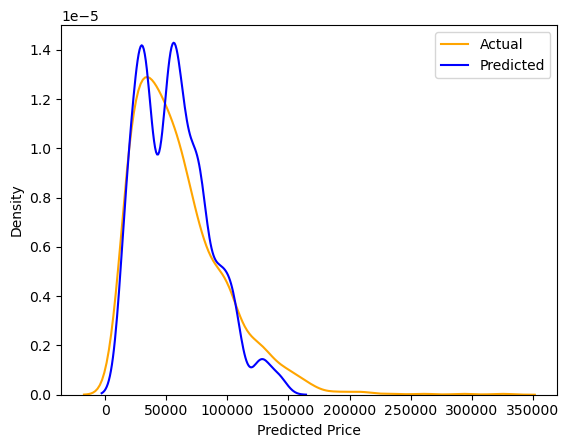

In [130]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regression version_2

In [135]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train.values,y_train.values)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test.values))}')

R2 score : 0.8879550380698259


In [136]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

[array([11.19432828]),
 array([10.88685941]),
 array([10.56036122]),
 array([11.81830692]),
 array([11.32272673]),
 array([9.90337574]),
 array([11.50082276]),
 array([10.88685941]),
 array([11.42376333]),
 array([10.7967314]),
 array([10.22188479]),
 array([9.94401905]),
 array([11.75683023]),
 array([10.27584271]),
 array([11.18550512]),
 array([11.32272673]),
 array([10.73750139]),
 array([11.81830692]),
 array([10.3103659]),
 array([11.05102755]),
 array([9.48342539]),
 array([10.88045983]),
 array([9.72510244]),
 array([10.80617769]),
 array([10.8488257]),
 array([10.08137644]),
 array([10.91923869]),
 array([10.68515458]),
 array([11.175939]),
 array([10.75518108]),
 array([9.62615339]),
 array([9.92493055]),
 array([10.14530589]),
 array([11.64139993]),
 array([10.91923869]),
 array([9.60954191]),
 array([9.93779062]),
 array([10.88120541]),
 array([10.33682148]),
 array([10.76273461]),
 array([10.0170042]),
 array([11.27482362]),
 array([10.35990332]),
 array([10.54787959]),
 a

In [137]:
'''
As we transformed our price variable to np.log,
we have to retransform it from np.log-->np.exp in order to get the result

'''

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [138]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu Brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,72716.840695
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,53469.111472
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,38575.059398
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,135714.258702
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,82679.480191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36457.409553
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,87877.352115
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processer,0,0,Intel,12757.326034
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,37808.326767


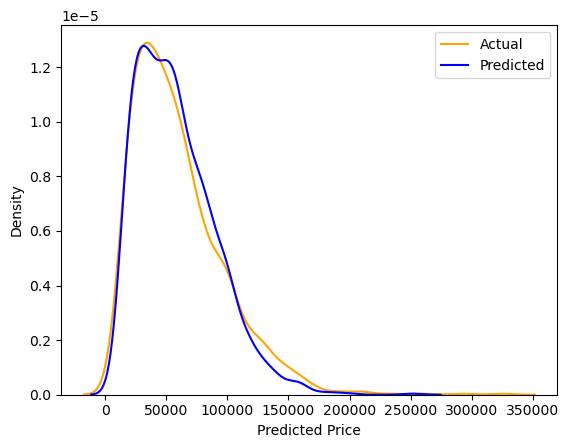

In [139]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [140]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()